In [15]:
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import zehavi_data_file_20, mock_data
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import emcee

In [3]:
wp_ng_vals = zehavi_data_file_20.get_wp()
bin_edges = zehavi_data_file_20.get_bins()
cov_matrix = zehavi_data_file_20.get_cov()
err = np.array([cov_matrix[i,i] for i in range(len(cov_matrix))])
bin_cen = (bin_edges[1:]+bin_edges[:-1])/2.

In [5]:
wp_ng_vals = mock_data.get_wp()
bin_edges = mock_data.get_bin_edges()
cov_matrix = mock_data.get_cov()
err = np.array([cov_matrix[i,i] for i in range(len(cov_matrix))])
bin_cen = (bin_edges[1:]+bin_edges[:-1])/2.

In [6]:
fname = "zehavi_smdpl_mvir_m20_2.h5"
fname = 'mock_data.h5'

In [7]:
files = [fname]

#files = [fname4,fname5]
s = []
log_prob_s = []
wp = []

for f in files: 
    reader = emcee.backends.HDFBackend(f, read_only=True)
    s.append(reader.get_chain(discard=500, flat=False, thin=1))
    log_prob_s.append(reader.get_log_prob(discard=500, flat=False, thin=1))
    wp.append(reader.get_blobs(discard=500))
    
print(np.shape(wp))
print(np.shape(s))
print(np.shape(log_prob_s))

(1, 26906, 20, 20)
(1, 26906, 20, 5)
(1, 26906, 20)


In [8]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

In [32]:
# animation function.  This is called sequentially
def animate(i):
    x = bin_cen
    y = wp[0][i][1]
    line.set_data(x, y)
    return line,

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.HTMLWriter'> instead.


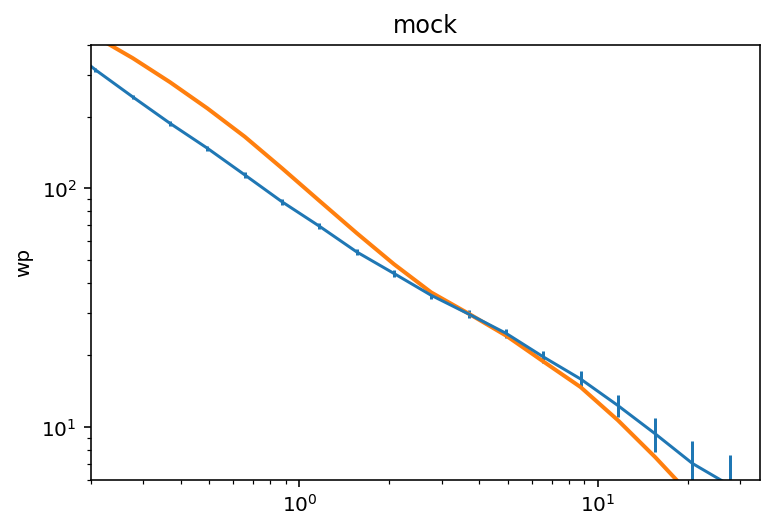

In [43]:
fig = plt.figure()
ax = plt.axes(xlim=(0.2, 35), ylim=(6, 400))
#ax.set_xlabel('rp')
ax.set_ylabel('wp')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('mock')#SMDPL M20 Mvir')
ax.errorbar(bin_cen,wp_ng_vals[0:len(wp_ng_vals)],yerr=np.sqrt(err))
line, = ax.plot([], [], lw=2)
#for i in range(0,20000,100):
#    animate(i)
#    fig.savefig('/Users/lmezini/Halo/anframes/i'+str(i)+'.png')

def update(i):
    label = 'step {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    #line.set_ydata(x - 5 + i)
    animate(i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(5000, 26000,50), interval=200)
    #if len(sys.argv) > 1 and sys.argv[1] == 'save':
    #anim.save('line.gif', dpi=80, writer='imagemagick')
    # plt.show() will just loop the animation forever.
    anim.save('line.html', dpi=80)
    #plt.show()

In [129]:
names = []
for i in range(45000,55000,40):
    names.append('/Users/lmezini/Halo/anframes/i'+str(i)+'.png')
with open('/Users/lmezini/Halo/anframes/names.txt','w') as f:
  f.write('\n'.join(names))

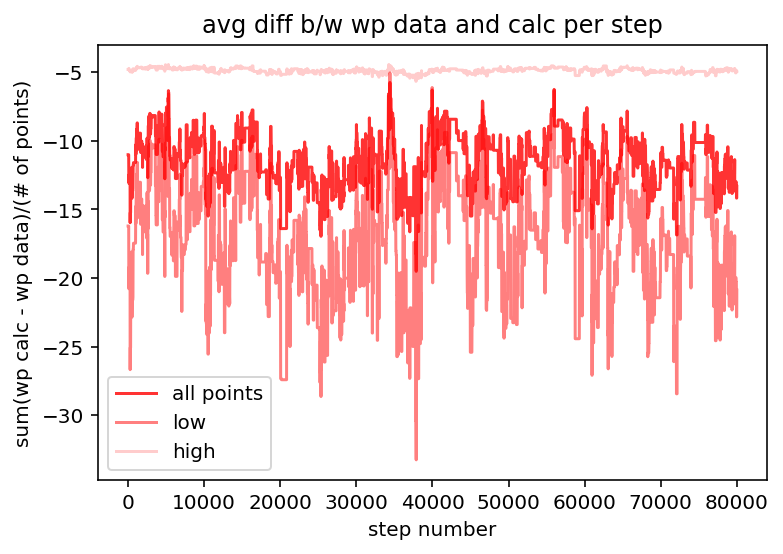

In [35]:
diff = []
diff_lo_r = []
diff_hi_r = []
x = np.linspace(0,8e4,8001)
j = 0
for i in range(0,8001):
    diff.append(np.sum(wp[0][i][1]-wp_ng_vals[1:13])/11)
    diff_hi_r.append(np.sum(wp[0][i][1][6:12]-wp_ng_vals[7:13])/6)
    diff_lo_r.append(np.sum(wp[0][i][1][0:5]-wp_ng_vals[1:6])/5)
m, b = np. polyfit(x, diff, 1)
plt.plot(x,diff, c='r',alpha=0.8,label='all points')
#plt.plot(x, m*x + b)#,label='slope= '+str(m))
#plt.legend()
plt.title('avg diff b/w wp data and calc per step')
plt.xlabel('step number')
plt.ylabel('sum(wp calc - wp data)/(# of points)')
#plt.show()

m_lo, b_lo = np. polyfit(x, diff_lo_r, 1)
plt.plot(x,diff_lo_r, c ='r', alpha=0.5,label='low')
#plt.plot(x, m_lo*x + b_lo)#,label='slope= '+str(m_lo))
#plt.legend()
#plt.title('avg diff b/w wp data and calc per step')
#plt.xlabel('step number')
#plt.ylabel('sum(wp calc - wp data)/11')
#plt.show()

m_hi, b_hi = np. polyfit(x, diff_hi_r, 1)
plt.plot(x,diff_hi_r,c='r',alpha=0.2,label='high')
#plt.plot(x, m_hi*x + b_hi)#,label='slope= '+str(m_hi))
plt.legend()
#plt.title('avg diff b/w wp data and calc per step')
#plt.xlabel('step number')
#plt.ylabel('sum(wp calc - wp data)/11')
plt.show()

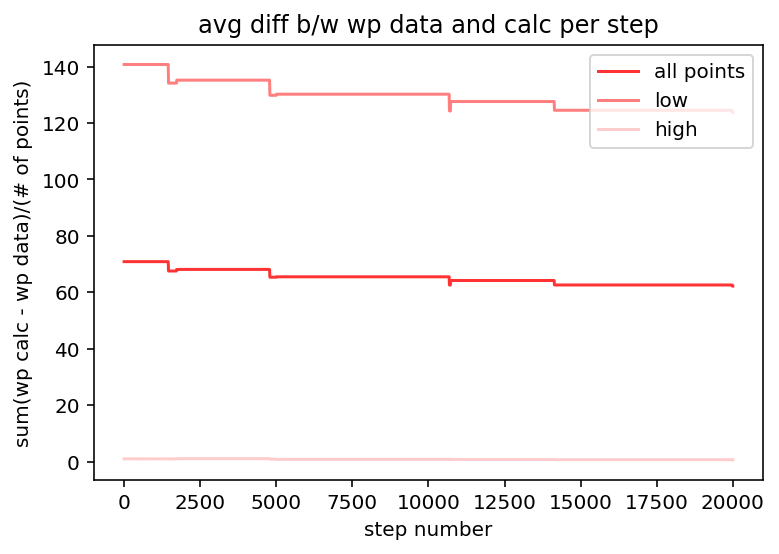

In [45]:
diff = []
diff_lo_r = []
diff_hi_r = []
x = np.linspace(0,2e4,2001)
j = 0
for i in range(0,2001):
    diff.append(np.sum(wp[0][i][1]-wp_ng_vals[0:len(wp_ng_vals)+1])/20)
    diff_hi_r.append(np.sum(wp[0][i][1][10:21]-wp_ng_vals[10:21])/10)
    diff_lo_r.append(np.sum(wp[0][i][1][0:10]-wp_ng_vals[0:10])/10)
m, b = np. polyfit(x, diff, 1)
plt.plot(x,diff, c='r',alpha=0.8,label='all points')
#plt.plot(x, m*x + b)#,label='slope= '+str(m))
#plt.legend()
plt.title('avg diff b/w wp data and calc per step')
plt.xlabel('step number')
plt.ylabel('sum(wp calc - wp data)/(# of points)')
#plt.show()

m_lo, b_lo = np. polyfit(x, diff_lo_r, 1)
plt.plot(x,diff_lo_r, c ='r', alpha=0.5,label='low')
#plt.plot(x, m_lo*x + b_lo)#,label='slope= '+str(m_lo))
#plt.legend()
#plt.title('avg diff b/w wp data and calc per step')
#plt.xlabel('step number')
#plt.ylabel('sum(wp calc - wp data)/11')
#plt.show()

m_hi, b_hi = np. polyfit(x, diff_hi_r, 1)
plt.plot(x,diff_hi_r,c='r',alpha=0.2,label='high')
#plt.plot(x, m_hi*x + b_hi)#,label='slope= '+str(m_hi))
plt.legend()
#plt.title('avg diff b/w wp data and calc per step')
#plt.xlabel('step number')
#plt.ylabel('sum(wp calc - wp data)/11')
plt.show()